In [3]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing the data
data = pd.read_csv('/content/drive/MyDrive/ml folder/E-com_Data.csv')
rows,cols = data.shape
print(f'The data has{rows} rows and {cols} columns.')

The data has541116 rows and 12 columns.


<ipython-input-5-9bfae9b33e4e>:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/ml folder/E-com_Data.csv')


In [6]:
# Number of features
cat_feat = []
num_feat = []
for attribute in data.columns:
  if data[attribute].dtype == 'O':
    cat_feat.append(attribute)
  else:
    num_feat.append(attribute)

print(f'We have {len(cat_feat)} categorical and {len(num_feat)} numerical features.')



We have 6 categorical and 6 numerical features.


In [7]:
# Percentage of missing values.
np.round(data.isnull().mean()*100,2)

# Customer ID is PII data - Personally Identifiable Information



CustomerID            25.30
Item Code              0.58
InvoieNo               0.58
Date of purchase       0.58
Quantity               0.58
Time                   0.58
price per Unit         0.58
Price                  0.58
Shipping Location      0.58
Cancelled_status      98.46
Reason of return     100.00
Sold as set          100.00
dtype: float64

In [8]:
! pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=27638f5a839d7674b8827d38d02a2f2a983e575a80f482b1b3f805fb1f703c62
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [9]:
from ydata_profiling import profile_report

repo = profile_report.ProfileReport(data)
repo.to_file(output_file = '/content/drive/MyDrive/ml folder')


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [11]:
data_to_drop = ['Item Code','Quantity','Time','price per Unit','Shipping Location','Cancelled_status','Reason of return','Sold as set']
data = data.drop(data_to_drop,axis =1)
data.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [12]:
data = data.rename(columns={'InvoieNo': 'InvoiceNo','Date of purchase':'Date'})
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [13]:
print('Number of duplicates before treating:', data.duplicated().sum())
data = data.drop_duplicates(ignore_index = True)
print('Number of duplicates after treating:',data.duplicated().sum())

Number of duplicates before treating: 6008
Number of duplicates after treating: 0


In [14]:
# Missing values
data.isna().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [15]:
# Removing missing values in customer id
data = data.dropna(subset = ['CustomerID'])
data.isna().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [17]:
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-17-f577c9c18bab>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   InvoiceNo   402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [19]:
data.describe()

,CustomerID,InvoiceNo,Date,Price
count,402859.000000,402859.000000,402859,402859.000000
mean,2182.187224,385642.971491,2017-07-15 14:25:02.538605056,2477.465103
min,2.000000,361429.000000,2016-12-02 00:00:00,-10152.000000
25%,1207.000000,374193.000000,2017-04-12 00:00:00,556.000000
50%,2078.000000,386934.000000,2017-08-05 00:00:00,1572.000000
75%,3291.000000,397130.000000,2017-10-26 00:00:00,2496.000000
max,4372.000000,406651.000000,2017-12-19 00:00:00,90400.000000
std,1252.636483,13106.663884,NaN,4896.268647


In [20]:
data['Date'].describe()

count                           402859
mean     2017-07-15 14:25:02.538605056
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [21]:
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [22]:
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [23]:
RFMScore = data.groupby('CustomerID').agg({'Date':lambda x:(latest_date - x.max()).days,
                                           'InvoiceNo':lambda x: x.count(),
                                           'Price': lambda x: x.sum()})
RFMScore.rename(columns = {'Date': 'Recency','InvoiceNo': 'Frequency','Price':'Monetory'},inplace = True)
RFMScore.head()

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0


In [24]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,751,279720.0


In [25]:
for attribute in RFMScore:
  print(f'For{attribute} the min value is {RFMScore[attribute].min()}and max value is {RFMScore[attribute].max()}')

ForRecency the min value is 1and max value is 381
ForFrequency the min value is 1and max value is 7919
ForMonetory the min value is -50372.0and max value is 35472089.0


In [26]:
RFMScore.describe()

,Recency,Frequency,Monetory
count,4349.000000,4349.000000,4.349000e+03
mean,93.299379,92.632559,2.294939e+05
std,100.701315,230.742279,8.556685e+05
min,1.000000,1.000000,-5.037200e+04
25%,18.000000,17.000000,3.814000e+04
50%,51.000000,42.000000,8.363500e+04
75%,144.000000,101.000000,2.054440e+05
max,381.000000,7919.000000,3.547209e+07


In [27]:
quantile = RFMScore.quantile(q = [0.25,0.5,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [28]:
def recency_score(x,p,d):
  # x- condition, p- percentile/quantile,d - data point
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4


def FnM_Score(x,p,d):
  # x - condition, p- percentile/quantile,d - data point
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1


In [29]:
RFMScore['R']= RFMScore["Recency"].apply(recency_score,args =('Recency',quantile))
RFMScore['F'] = RFMScore["Frequency"].apply(FnM_Score,args = ('Frequency',quantile))
RFMScore['M'] = RFMScore["Monetory"].apply(FnM_Score,args = ('Monetory',quantile))



In [30]:
RFMScore.reset_index(inplace = True)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2


In [31]:
RFMScore['RFM'] = RFMScore.R.map(str) + RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore['RFM_Score'] = RFMScore[['R','F','M']].sum(axis =1)
RFMScore.reset_index(inplace = True)
RFMScore.head()

,index,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score
0,0,2.0,4,181,550416.0,1,1,1,111,3
1,1,3.0,77,27,257404.0,3,3,1,331,7
2,2,4.0,19,72,176613.0,2,2,2,222,6
3,3,5.0,311,16,41976.0,4,4,3,443,11
4,4,6.0,37,84,151822.0,2,2,2,222,6


In [36]:
Loyal_customer = ['Platinum','Gold','Silver','Brinze']
score_cuts = pd.qcut(RFMScore.RFM_Score,4,labels = Loyal_customer)
RFMScore['Loyality'] = score_cuts.values
RFMScore.reset_index(inplace = True)
del RFMScore['index']
RFMScore.head()

ValueError: cannot insert level_0, already exists

In [37]:
RFMScore.to_csv('/content/drive/MyDrive/ml folder.html')

In [38]:
RFMScore['Loyality'].value_counts()

Loyality
Gold        1313
Platinum    1280
Silver       966
Brinze       790
Name: count, dtype: int64

In [ ]:
#Visualisation

In [39]:
RFMScore.head()

,level_0,index,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyality
0,0,0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,1,1,3.0,77,27,257404.0,3,3,1,331,7,Gold
2,2,2,4.0,19,72,176613.0,2,2,2,222,6,Gold
3,3,3,5.0,311,16,41976.0,4,4,3,443,11,Brinze
4,4,4,6.0,37,84,151822.0,2,2,2,222,6,Gold


In [40]:
new_data = RFMScore.groupby('Loyality')[['Recency', 'Frequency', 'Monetory', 'CustomerID']].agg({
                    'Recency': 'sum', 'Frequency': 'sum', 'Monetory': 'sum', 'CustomerID': 'nunique'})
new_data = new_data.rename(columns={'CustomerID': 'No_of_customers'})
new_data.reset_index(inplace=True)

In [41]:
new_data.head()

,Loyality,Recency,Frequency,Monetory,No_of_customers
0,Platinum,25971,294629,763311232.0,1280
1,Gold,84142,75914,165998506.0,1313
2,Silver,121714,23728,50215730.1,966
3,Brinze,173932,8588,18543646.0,790


In [42]:
new_data['Percentage'] = round(new_data['No_of_customers']/len(RFMScore)*100,2)
new_data

,Loyality,Recency,Frequency,Monetory,No_of_customers,Percentage
0,Platinum,25971,294629,763311232.0,1280,29.43
1,Gold,84142,75914,165998506.0,1313,30.19
2,Silver,121714,23728,50215730.1,966,22.21
3,Brinze,173932,8588,18543646.0,790,18.17


In [44]:
vis_data = new_data.drop(['Recency','Frequency','Monetory'],axis = 1)
vis_data.head()

,Loyality,No_of_customers,Percentage
0,Platinum,1280,29.43
1,Gold,1313,30.19
2,Silver,966,22.21
3,Brinze,790,18.17


In [45]:
! pip install squarify

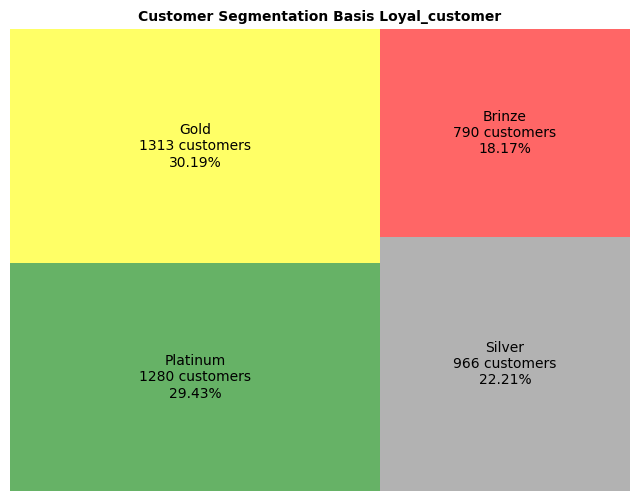

In [47]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8,6)
colors_dics = {'Platinum':'green','Gold':'yellow','Silver':'gray','Bronze':'red'}

squarify.plot(sizes = vis_data['No_of_customers'],color = colors_dics.values(),
              label = ['{}\n{:.0f} customers\n{}%'.format(*vis_data.iloc[i])
                        for i in range(0, len(vis_data))],alpha = 0.6)
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=10, fontweight='bold')
plt.axis("off")
plt.show()


In [ ]:
# Building unsupervised model

In [48]:
unsupervised_data = RFMScore.iloc[:,1:4]
unsupervised_data.head()

,index,CustomerID,Recency
0,0,2.0,4
1,1,3.0,77
2,2,4.0,19
3,3,5.0,311
4,4,6.0,37


In [50]:
# Mandatory preprocessing - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
unsupervised_data_sc = sc.fit_transform(unsupervised_data)
unsupervised_data_sc

array([[-1.73165259, -1.73227732, -0.88687668],
       [-1.73085606, -1.73148455, -0.16187726],
       [-1.73005953, -1.73069178, -0.73790419],
       ...,
       [ 1.73005953,  1.73054376, -0.83721918],
       [ 1.73085606,  1.73133653, -0.88687668],
       [ 1.73165259,  1.73212931, -0.48961672]])

In [52]:
scaled_data  = pd.DataFrame(unsupervised_data_sc,index = unsupervised_data.index, columns = unsupervised_data.columns)
scaled_data

,index,CustomerID,Recency
0,-1.731653,-1.732277,-0.886877
1,-1.730856,-1.731485,-0.161877
2,-1.730060,-1.730692,-0.737904
3,-1.729263,-1.729899,2.162093
4,-1.728466,-1.729106,-0.559137
...,...,...,...
4344,1.728466,1.728958,1.834354
4345,1.729263,1.729751,0.870999
4346,1.730060,1.730544,-0.837219
4347,1.730856,1.731337,-0.886877


In [53]:
# Import model
from sklearn.cluster import KMeans

wcss = []
for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

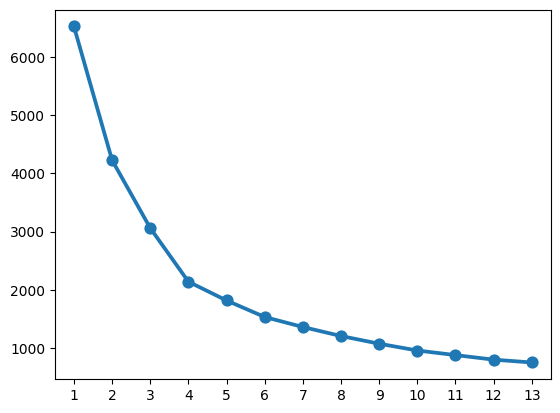

In [54]:
# Elbow curve
sns.pointplot(x=list(range(1,14)), y=wcss)
plt.show()

In [55]:
KM = KMeans(n_clusters=6, init='k-means++', max_iter=1000, random_state=42)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [56]:
scaled_data['Clusters'] = KM.labels_
scaled_data.head()

,index,CustomerID,Recency,Clusters
0,-1.731653,-1.732277,-0.886877,4
1,-1.730856,-1.731485,-0.161877,4
2,-1.730060,-1.730692,-0.737904,4
3,-1.729263,-1.729899,2.162093,2
4,-1.728466,-1.729106,-0.559137,4


In [57]:
scaled_data['Clusters'].value_counts()

Clusters
5    858
3    857
4    829
0    819
2    505
1    481
Name: count, dtype: int64

In [58]:
unsupervised_data['Clusters'] = KM.labels_
unsupervised_data.head()

,index,CustomerID,Recency,Clusters
0,0,2.0,4,4
1,1,3.0,77,4
2,2,4.0,19,4
3,3,5.0,311,2
4,4,6.0,37,4
